In [ ]:
from fluid_experiment.fluid_experiment import FluidExperiment

path_experiment = "/Users/lukasv/DATA/midap/FluidPhage_REP1_results"
color_channels = ["CFP","YFP"]
name = "FluidPhage"

exp = FluidExperiment(path_experiment,color_channels, name=name)


exp.load_metadata_template()
exp.calculate_transform_data("major_axis_length")
exp.calculate_transform_data("area")

exp.plot_spatial_maps(50,property_column="major_axis_length")


exp.add_bin_data({"bin1":range(0,20),"bin2":range(20,40)})
exp.save()

exp2 = FluidExperiment.load(path_experiment + "/FluidPhage.h5")

Loading sample at position pos1 for color channel CFP
Loading sample at position pos1 for color channel YFP
Loading sample at position pos2 for color channel CFP
Loading sample at position pos2 for color channel YFP
Loading sample at position pos3 for color channel CFP
Loading sample at position pos3 for color channel YFP
Loading sample at position pos4 for color channel CFP
Loading sample at position pos4 for color channel YFP
Loading sample at position pos5 for color channel CFP
Loading sample at position pos5 for color channel YFP
Loading sample at position pos6 for color channel CFP
Loading sample at position pos6 for color channel YFP
Loading sample at position pos7 for color channel CFP
Loading sample at position pos7 for color channel YFP
Loading sample at position pos8 for color channel CFP
Loading sample at position pos8 for color channel YFP
Loading sample at position pos9 for color channel CFP
Loading sample at position pos9 for color channel YFP
Loading sample at position p

In [3]:

test = exp2["pos1"]["CFP"]
test2 = exp["pos1"]["CFP"]


In [21]:
print(exp)


FluidExperiment with path: /Users/lukasv/DATA/midap/FluidPhage_REP1_results
18 positions: pos1, pos2, pos3, pos4, pos5, pos6, pos7, pos8, pos9, pos10, pos11, pos12, pos13, pos14, pos15, pos16, pos17, pos18
2 color channels: CFP, YFP
length of experiment is consistent: 143
experiment has consistent headers: Unnamed: 0, globalID, frame, labelID, trackID, lineageID, trackID_d1, trackID_d2, split, trackID_mother, first_frame, last_frame, area, edges_min_row, edges_min_col, edges_max_row, edges_max_col, intensity_max, intensity_mean, intensity_min, minor_axis_length, major_axis_length, x, y



In [22]:
exp.load_metadata_template()
print(exp)

FluidExperiment with path: /Users/lukasv/DATA/midap/FluidPhage_REP1_results
18 positions: pos1, pos2, pos3, pos4, pos5, pos6, pos7, pos8, pos9, pos10, pos11, pos12, pos13, pos14, pos15, pos16, pos17, pos18
2 color channels: CFP, YFP
length of experiment is consistent: 143
experiment has consistent headers: Unnamed: 0, globalID, frame, labelID, trackID, lineageID, trackID_d1, trackID_d2, split, trackID_mother, first_frame, last_frame, area, edges_min_row, edges_min_col, edges_max_row, edges_max_col, intensity_max, intensity_mean, intensity_min, minor_axis_length, major_axis_length, x, y
Experiment has metadata:
         position   group       experiment  device_channel
position                                                  
pos1         pos1  Group1  FluidPhage_Rep1               1
pos2         pos2  Group1  FluidPhage_Rep1               1
pos3         pos3  Group1  FluidPhage_Rep1               1
pos4         pos4  Group1  FluidPhage_Rep1               2
pos5         pos5  Group1  F

In [23]:
exp2 = FluidExperiment.from_copy(exp)
exp2.drop_positions(["pos1","pos2","pos3"])
print(exp2)

Dropping position pos1 from experiment
Dropping position pos2 from experiment
Dropping position pos3 from experiment
FluidExperiment with path: /Users/lukasv/DATA/midap/FluidPhage_REP1_results
15 positions: pos4, pos5, pos6, pos7, pos8, pos9, pos10, pos11, pos12, pos13, pos14, pos15, pos16, pos17, pos18
2 color channels: CFP, YFP
length of experiment is consistent: 143
experiment has consistent headers: Unnamed: 0, globalID, frame, labelID, trackID, lineageID, trackID_d1, trackID_d2, split, trackID_mother, first_frame, last_frame, area, edges_min_row, edges_min_col, edges_max_row, edges_max_col, intensity_max, intensity_mean, intensity_min, minor_axis_length, major_axis_length, x, y
Experiment has metadata:
         position   group       experiment  device_channel
position                                                  
pos4         pos4  Group1  FluidPhage_Rep1               2
pos5         pos5  Group1  FluidPhage_Rep1               2
pos6         pos6  Group1  FluidPhage_Rep1     

In [24]:
exp3 = exp + exp2
print(exp3)

FluidExperiment with path: /Users/lukasv/DATA/midap/FluidPhage_REP1_results
33 positions: pos1, pos2, pos3, pos4, pos5, pos6, pos7, pos8, pos9, pos10, pos11, pos12, pos13, pos14, pos15, pos16, pos17, pos18, pos4.1, pos5.1, pos6.1, pos7.1, pos8.1, pos9.1, pos10.1, pos11.1, pos12.1, pos13.1, pos14.1, pos15.1, pos16.1, pos17.1, pos18.1
2 color channels: CFP, YFP
length of experiment is consistent: 143
experiment has consistent headers: Unnamed: 0, globalID, frame, labelID, trackID, lineageID, trackID_d1, trackID_d2, split, trackID_mother, first_frame, last_frame, area, edges_min_row, edges_min_col, edges_max_row, edges_max_col, intensity_max, intensity_mean, intensity_min, minor_axis_length, major_axis_length, x, y
Experiment has metadata:
   position   group       experiment  device_channel
0      pos1  Group1  FluidPhage_Rep1               1
1      pos2  Group1  FluidPhage_Rep1               1
2      pos3  Group1  FluidPhage_Rep1               1
3      pos4  Group1  FluidPhage_Rep1     

Dropping color_channel CFP from position pos1 in experiment
Dropping color_channel CFP from position pos2 in experiment
Dropping color_channel CFP from position pos3 in experiment
Dropping color_channel CFP from position pos4 in experiment
Dropping color_channel CFP from position pos5 in experiment
Dropping color_channel CFP from position pos6 in experiment
Dropping color_channel CFP from position pos7 in experiment
Dropping color_channel CFP from position pos8 in experiment
Dropping color_channel CFP from position pos9 in experiment
Dropping color_channel CFP from position pos10 in experiment
Dropping color_channel CFP from position pos11 in experiment
Dropping color_channel CFP from position pos12 in experiment
Dropping color_channel CFP from position pos13 in experiment
Dropping color_channel CFP from position pos14 in experiment
Dropping color_channel CFP from position pos15 in experiment
Dropping color_channel CFP from position pos16 in experiment
Dropping color_channel CFP from p

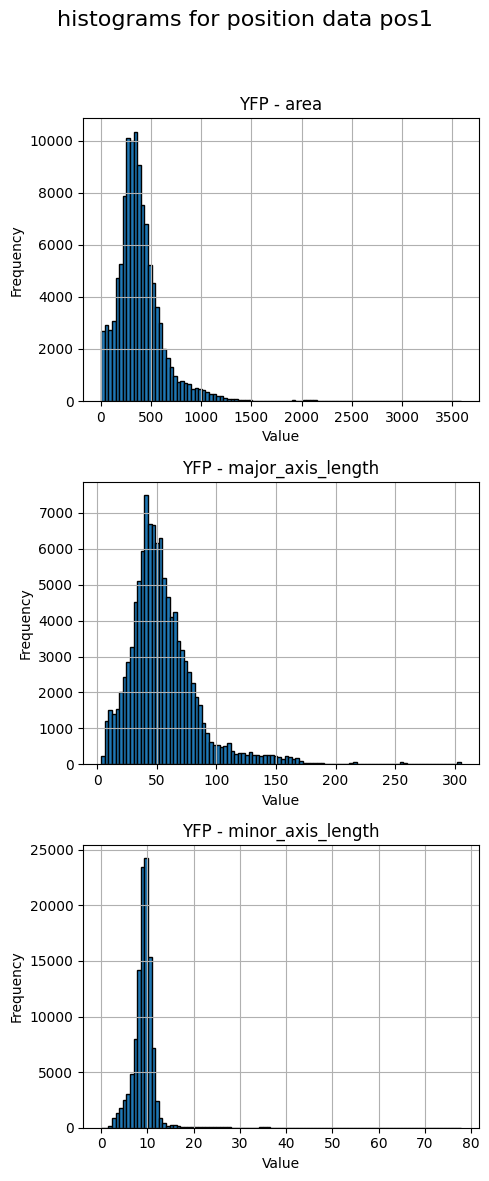

In [25]:
exp3.drop_color_channels(["CFP"])
print(exp3)
exp3.plot_qc_histograms(["area","major_axis_length","minor_axis_length"],positions=["pos1"])

FluidExperiment with path: /Users/lukasv/DATA/midap/FluidPhage_REP1_results
33 positions: pos1, pos2, pos3, pos4, pos5, pos6, pos7, pos8, pos9, pos10, pos11, pos12, pos13, pos14, pos15, pos16, pos17, pos18, pos4.1, pos5.1, pos6.1, pos7.1, pos8.1, pos9.1, pos10.1, pos11.1, pos12.1, pos13.1, pos14.1, pos15.1, pos16.1, pos17.1, pos18.1
1 color channels: GFP
length of experiment is consistent: 143
experiment has consistent headers: Unnamed: 0, globalID, frame, labelID, trackID, lineageID, trackID_d1, trackID_d2, split, trackID_mother, first_frame, last_frame, area, edges_min_row, edges_min_col, edges_max_row, edges_max_col, intensity_max, intensity_mean, intensity_min, minor_axis_length, major_axis_length, x, y
Experiment has metadata:
   position   group       experiment  device_channel
0      pos1  Group1  FluidPhage_Rep1               1
1      pos2  Group1  FluidPhage_Rep1               1
2      pos3  Group1  FluidPhage_Rep1               1
3      pos4  Group1  FluidPhage_Rep1          

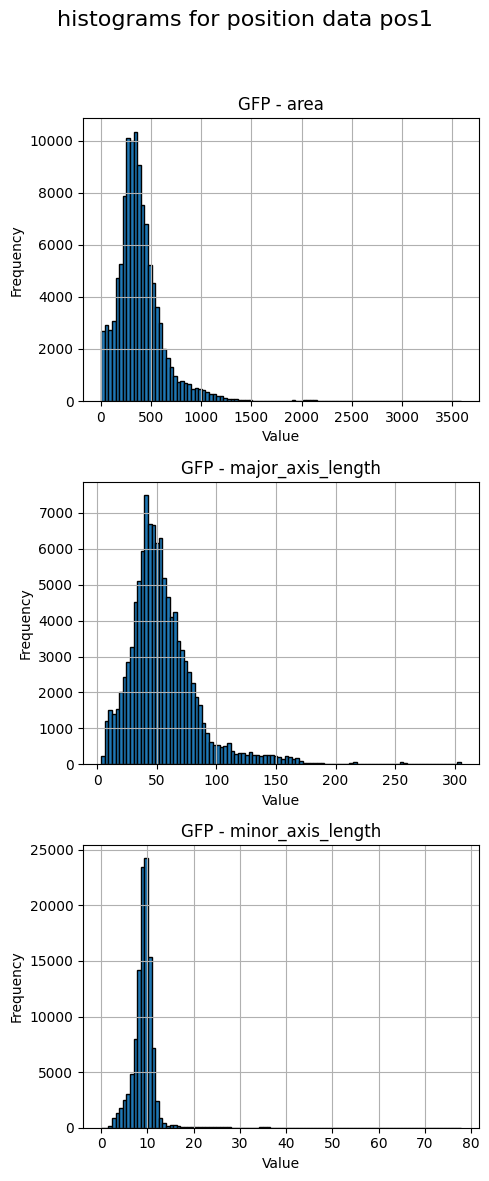

In [26]:
exp3.rename_color_channel("YFP","GFP")
print(exp3)
exp3.plot_qc_histograms(["area","major_axis_length","minor_axis_length"],positions=["pos1"])

,Unnamed: 0,globalID,frame,labelID,trackID,lineageID,trackID_d1,trackID_d2,split,trackID_mother,...,edges_min_col,edges_max_row,edges_max_col,intensity_max,intensity_mean,intensity_min,minor_axis_length,major_axis_length,x,y
0,0,1,0,1,1,1,2.0,35.0,0,NaN,...,109.0,92.0,159.0,0.631373,0.458002,0.149020,12.751901,95.023416,53.980952,135.554762
1,1,2,1,1,1,1,2.0,35.0,0,NaN,...,110.0,97.0,161.0,0.694118,0.496081,0.160784,12.663529,99.351827,57.033670,136.961841
2,2,3,2,1,1,1,2.0,35.0,0,NaN,...,111.0,99.0,163.0,0.674510,0.491166,0.152941,12.629056,102.885918,58.296499,138.391685
3,3,4,3,1,1,1,2.0,35.0,0,NaN,...,110.0,103.0,165.0,0.694118,0.507951,0.152941,12.789244,108.851398,59.418314,138.850156
4,4,5,4,1,1,1,2.0,35.0,0,NaN,...,110.0,108.0,166.0,0.705882,0.524513,0.164706,13.687445,114.129662,61.366502,139.847291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55859,55859,55860,142,340,6051,6051,NaN,NaN,0,NaN,...,341.0,848.0,398.0,0.662745,0.500186,0.231373,9.914373,67.459860,831.569170,369.930830
55860,55860,55861,143,338,6051,6051,NaN,NaN,0,NaN,...,341.0,848.0,398.0,0.658824,0.499137,0.239216,10.040347,67.683840,831.878669,369.585127
55861,55861,55862,142,351,6052,6052,NaN,NaN,0,NaN,...,387.0,880.0,393.0,0.321569,0.299085,0.270588,2.532217,7.513328,876.666667,389.600000
55862,55862,55863,143,127,6053,6053,NaN,NaN,0,NaN,...,483.0,401.0,487.0,0.086275,0.078431,0.066667,3.790761,24.419746,389.528571,484.628571
